In [48]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import squidpy as sq
import pandas as pd
import numpy as np

# Install PASTE2 python package

You can install the paste2 package at https://pypi.org/project/paste2/. We import paste2 as follows:

In [37]:
from paste2 import PASTE2, projection

# Read in Spatial Transcriptomics slices as AnnData objects

We provide four example ST slices from DLPFC patient 3, cropped to form partially overlapping subslices (See Figure 3A of our paper). Each slice is stored in an [AnnData](https://anndata.readthedocs.io/en/latest/) object.

In [24]:
sliceA_filename = 'sample_data/151673.h5ad'
sliceB_filename = 'sample_data/151674.h5ad'
sliceC_filename = 'sample_data/151675.h5ad'
sliceD_filename = 'sample_data/151676.h5ad'
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
sliceC = sc.read_h5ad(sliceC_filename)
sliceD = sc.read_h5ad(sliceD_filename)

Each AnnData object consists of a gene expression matrx and spatial coordinate matrix. The gene expression matrix is stored in the .X field. The spatial coordiante matrix is stored in the .obsm['spatial'] field.

In [25]:
sliceA.X

<2929x11381 sparse matrix of type '<class 'numpy.float32'>'
	with 5798687 stored elements in Compressed Sparse Row format>

In [28]:
sliceA.obsm['spatial']

array([[ 5769,  2807],
       [ 4068,  9505],
       [ 3393,  7583],
       ...,
       [ 4631,  7831],
       [ 5571, 11193],
       [ 6317,  3291]])

The rows of the AnnData objects are spots. The columns are genes.

In [26]:
sliceA.obs

,in_tissue,array_row,array_col,imagerow,imagecol,sum_umi,sum_gene,subject,position,replicate,...,layer_guess_reordered_short,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,n_counts
AAACAATCTACTAGCA-1.3,1,3,43,126.327637,259.630972,1667,1150,Br8100,0,1,...,L1,1150,7.048386,1667.0,7.419381,22.975405,30.173965,42.171566,61.007798,1628.0
AAACACCAATAACTGC-1.8,1,59,19,427.767792,183.078314,3769,1960,Br8100,0,1,...,WM,1960,7.581210,3769.0,8.234830,25.975060,33.138764,42.531175,59.697533,3704.0
AAACAGCTTTCAGAAG-1.7,1,43,9,341.269139,152.700275,4278,2264,Br8100,0,1,...,L5,2264,7.725330,4278.0,8.361475,23.796166,30.201029,38.826554,54.698457,4217.0
AAACAGGGTCTATATT-1.8,1,47,13,362.916304,164.941500,4004,2178,Br8100,0,1,...,L6,2178,7.686621,4004.0,8.295299,24.600400,30.669331,39.185814,55.344655,3922.0
AAACAGTGTTCCTGGG-1.5,1,73,43,503.780395,256.930702,2376,1432,Br8100,0,1,...,WM,1432,7.267525,2376.0,7.773594,26.136364,33.501684,43.308081,60.774411,2339.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTTCACATCCAGG-1.8,1,58,42,422.862301,254.410450,4324,2170,Br8100,0,1,...,WM,2170,7.682943,4324.0,8.372168,22.941721,30.388529,40.703053,57.770583,4266.0
TTGTTTCATTAGTCTA-1.8,1,60,30,433.393354,217.146722,2761,1560,Br8100,0,1,...,WM,1560,7.353082,2761.0,7.923710,26.439696,34.190511,43.824701,61.608113,2715.0
TTGTTTCCATACAACT-1.8,1,45,27,352.430255,208.415849,2322,1343,Br8100,0,1,...,L6,1343,7.203406,2322.0,7.750615,31.093885,37.941430,47.243755,63.695090,2300.0
TTGTTTGTATTACACG-1.4,1,73,41,503.735391,250.720081,2331,1420,Br8100,0,1,...,WM,1420,7.259116,2331.0,7.754481,25.139425,32.947233,42.728443,60.531961,2286.0


In [27]:
sliceA.var

,gene_ids,feature_types,genome,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_counts
NOC2L,ENSG00000188976,Gene Expression,GRCh38,690,0.223963,0.202094,81.038747,815.0,6.704414,815.0
KLHL17,ENSG00000187961,Gene Expression,GRCh38,163,0.045342,0.044344,95.520747,165.0,5.111988,165.0
HES4,ENSG00000188290,Gene Expression,GRCh38,875,0.303105,0.264750,75.954933,1103.0,7.006695,1103.0
ISG15,ENSG00000187608,Gene Expression,GRCh38,968,0.318494,0.276490,73.399286,1159.0,7.056175,1159.0
AGRN,ENSG00000188157,Gene Expression,GRCh38,1038,0.351470,0.301193,71.475680,1279.0,7.154615,1279.0
...,...,...,...,...,...,...,...,...,...,...
MT-ND4,ENSG00000198886,Gene Expression,GRCh38,3639,85.596596,4.461260,0.000000,311486.0,12.649113,311486.0
MT-ND5,ENSG00000198786,Gene Expression,GRCh38,3593,9.799670,2.379516,1.264084,35661.0,10.481841,35661.0
MT-ND6,ENSG00000198695,Gene Expression,GRCh38,1966,0.860126,0.620644,45.974169,3130.0,8.049108,3130.0
MT-CYB,ENSG00000198727,Gene Expression,GRCh38,3639,49.170376,3.915425,0.000000,178931.0,12.094761,178931.0


We can visualize the slices using [squidpy](https://squidpy.readthedocs.io/en/stable/index.html). In this case, the .obs["layer_guess_reordered"] field stores the layer annotation of each slice, so we use this field to color each spot.

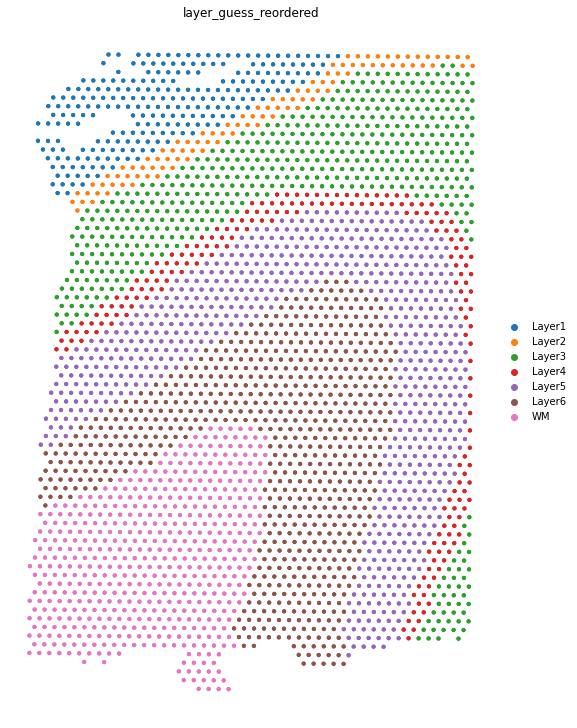

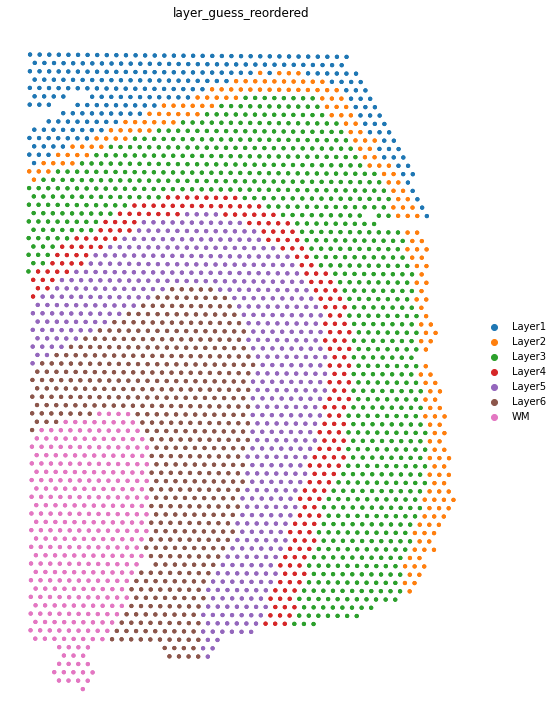

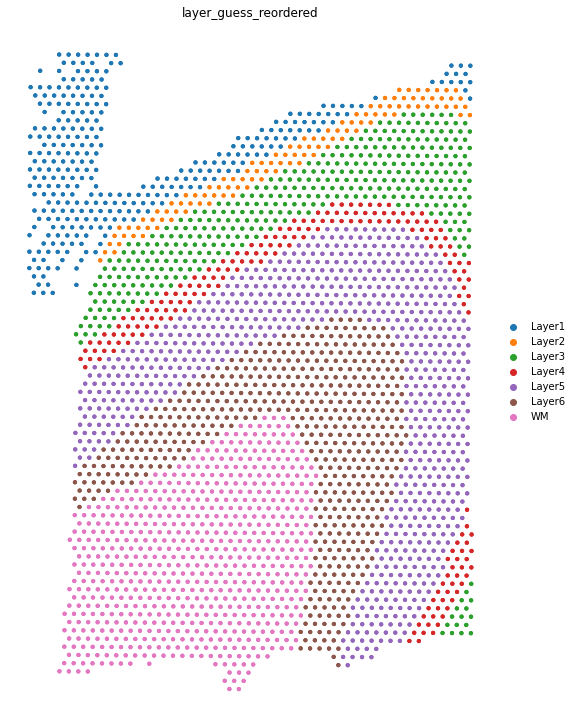

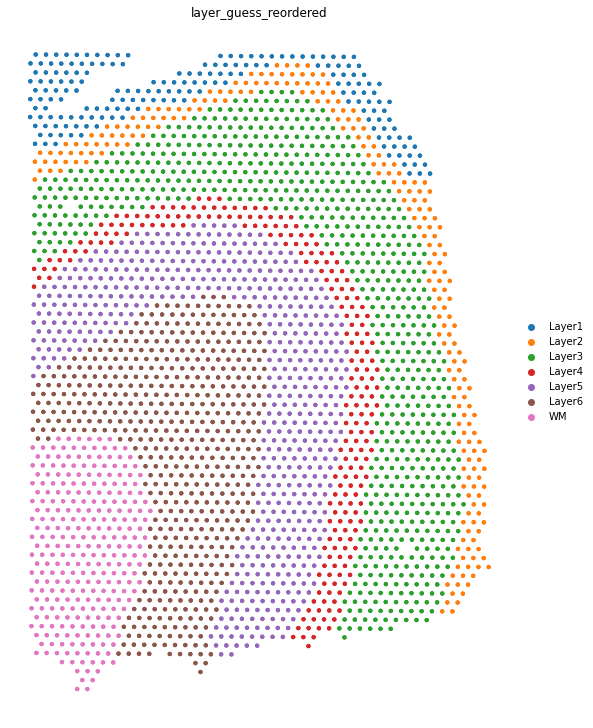

In [29]:
sq.pl.spatial_scatter(
    sliceA,
    frameon=False,
    shape=None,
    color='layer_guess_reordered',
    figsize=(10, 10)
)
sq.pl.spatial_scatter(
    sliceB,
    frameon=False,
    shape=None,
    color='layer_guess_reordered',
    figsize=(10, 10)
)
sq.pl.spatial_scatter(
    sliceC,
    frameon=False,
    shape=None,
    color='layer_guess_reordered',
    figsize=(10, 10)
)
sq.pl.spatial_scatter(
    sliceD,
    frameon=False,
    shape=None,
    color='layer_guess_reordered',
    figsize=(10, 10)
)

# Compute partial pairwise alignment using PASTE2

Give a pair of partially overlapping slices, we can use PASTE2.partial_pairwise_align( ) to find an alignment matrix. To call the function, you need to input the AnnData objects of the two slices, as well as a parameter s, which indicates the overlap percentage of the two slices. In this tutorial, each pair of cropped subslices overlap at 70% of the areas, so we set s=0.7. For your own datasets you should visualize the slices and manually determine the approxiamte overlap percentage (this parameter does not have to be very accurate).

Now we compute an alignment matrix between each pair of slices in our example dataset:

In [33]:
pi_AB = PASTE2.partial_pairwise_align(sliceA, sliceB, s=0.7)

PASTE2 starts...
Starting GLM-PCA...
Iteration: 0 | deviance=1.3992E+7
Iteration: 1 | deviance=1.3990E+7
Iteration: 2 | deviance=1.2366E+7
Iteration: 3 | deviance=1.1999E+7
Iteration: 4 | deviance=1.1841E+7
Iteration: 5 | deviance=1.1761E+7
Iteration: 6 | deviance=1.1715E+7
Iteration: 7 | deviance=1.1687E+7
Iteration: 8 | deviance=1.1667E+7
Iteration: 9 | deviance=1.1653E+7
Iteration: 10 | deviance=1.1642E+7
Iteration: 11 | deviance=1.1634E+7
Iteration: 12 | deviance=1.1627E+7
Iteration: 13 | deviance=1.1621E+7
Iteration: 14 | deviance=1.1616E+7
Iteration: 15 | deviance=1.1612E+7
Iteration: 16 | deviance=1.1608E+7
Iteration: 17 | deviance=1.1605E+7
Iteration: 18 | deviance=1.1603E+7
Iteration: 19 | deviance=1.1600E+7
Iteration: 20 | deviance=1.1598E+7
Iteration: 21 | deviance=1.1596E+7
Iteration: 22 | deviance=1.1594E+7
Iteration: 23 | deviance=1.1593E+7
Iteration: 24 | deviance=1.1591E+7
Iteration: 25 | deviance=1.1590E+7
Iteration: 26 | deviance=1.1589E+7
GLM-PCA finished.
It.  |Loss

In [34]:
pi_BC = PASTE2.partial_pairwise_align(sliceB, sliceC, s=0.7)

PASTE2 starts...
Starting GLM-PCA...
Iteration: 0 | deviance=1.3224E+7
Iteration: 1 | deviance=1.3222E+7
Iteration: 2 | deviance=1.1785E+7
Iteration: 3 | deviance=1.1463E+7
Iteration: 4 | deviance=1.1317E+7
Iteration: 5 | deviance=1.1249E+7
Iteration: 6 | deviance=1.1211E+7
Iteration: 7 | deviance=1.1186E+7
Iteration: 8 | deviance=1.1168E+7
Iteration: 9 | deviance=1.1154E+7
Iteration: 10 | deviance=1.1143E+7
Iteration: 11 | deviance=1.1134E+7
Iteration: 12 | deviance=1.1127E+7
Iteration: 13 | deviance=1.1121E+7
Iteration: 14 | deviance=1.1116E+7
Iteration: 15 | deviance=1.1111E+7
Iteration: 16 | deviance=1.1108E+7
Iteration: 17 | deviance=1.1104E+7
Iteration: 18 | deviance=1.1101E+7
Iteration: 19 | deviance=1.1099E+7
Iteration: 20 | deviance=1.1096E+7
Iteration: 21 | deviance=1.1094E+7
Iteration: 22 | deviance=1.1092E+7
Iteration: 23 | deviance=1.1090E+7
Iteration: 24 | deviance=1.1089E+7
Iteration: 25 | deviance=1.1087E+7
Iteration: 26 | deviance=1.1086E+7
Iteration: 27 | deviance=1.1

In [35]:
pi_CD = PASTE2.partial_pairwise_align(sliceC, sliceD, s=0.7)

PASTE2 starts...
Starting GLM-PCA...
Iteration: 0 | deviance=1.2106E+7
Iteration: 1 | deviance=1.2106E+7
Iteration: 2 | deviance=1.0957E+7
Iteration: 3 | deviance=1.0653E+7
Iteration: 4 | deviance=1.0515E+7
Iteration: 5 | deviance=1.0446E+7
Iteration: 6 | deviance=1.0409E+7
Iteration: 7 | deviance=1.0385E+7
Iteration: 8 | deviance=1.0368E+7
Iteration: 9 | deviance=1.0355E+7
Iteration: 10 | deviance=1.0345E+7
Iteration: 11 | deviance=1.0337E+7
Iteration: 12 | deviance=1.0331E+7
Iteration: 13 | deviance=1.0325E+7
Iteration: 14 | deviance=1.0320E+7
Iteration: 15 | deviance=1.0316E+7
Iteration: 16 | deviance=1.0313E+7
Iteration: 17 | deviance=1.0309E+7
Iteration: 18 | deviance=1.0307E+7
Iteration: 19 | deviance=1.0304E+7
Iteration: 20 | deviance=1.0302E+7
Iteration: 21 | deviance=1.0300E+7
Iteration: 22 | deviance=1.0298E+7
Iteration: 23 | deviance=1.0296E+7
Iteration: 24 | deviance=1.0295E+7
Iteration: 25 | deviance=1.0293E+7
Iteration: 26 | deviance=1.0292E+7
Iteration: 27 | deviance=1.0

Let's check the shape of each alignment matrix. For aligning a slice with n1 spots and a slice with n2 spots, the alignment matrix should be of shape (n1 * n2)

In [45]:
print(pi_AB.shape)
print(pi_BC.shape)
print(pi_CD.shape)

(2929, 2877)
(2877, 2873)
(2873, 2701)


There are other optional parameters to PASTE2.partial_pairwise_align() as well. You can checkout the original function signature in the souce code with documentation.

Let's visualize the alignment between sliceA and sliceB:

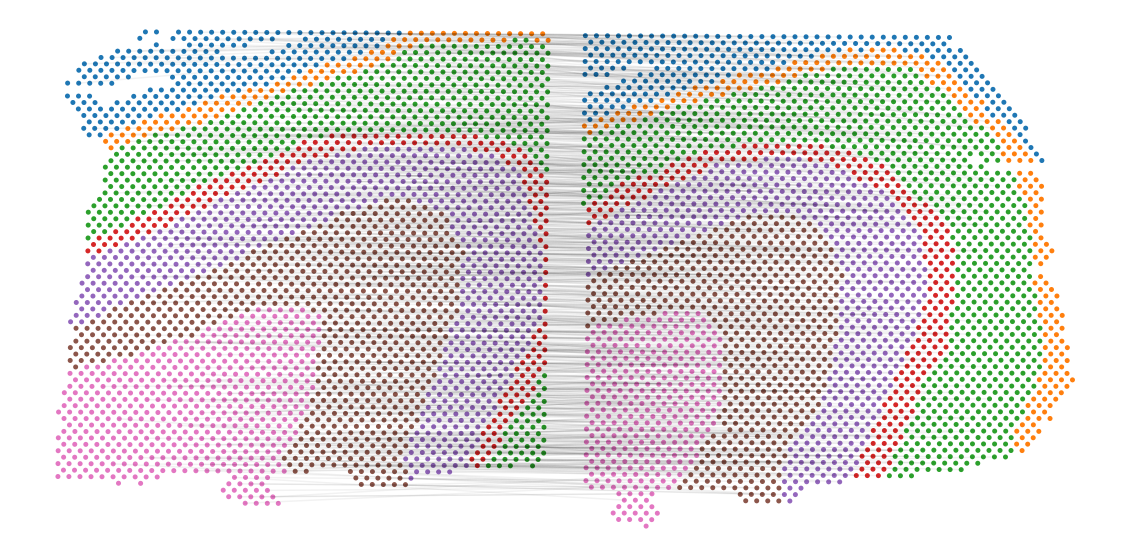

In [52]:
def largest_indices(ary, n):
    """Returns the n largest indices from a numpy array."""
    flat = ary.flatten()
    indices = np.argpartition(flat, -n)[-n:]
    indices = indices[np.argsort(-flat[indices])]
    return np.unravel_index(indices, ary.shape)


def plot2D_samples_mat(xs, xt, G, thr=1e-8, alpha=0.2, top=1000, weight_alpha=False, **kwargs):
    if ('color' not in kwargs) and ('c' not in kwargs):
        kwargs['color'] = 'k'
    mx = G.max()
    #     idx = np.where(G/mx>=thr)
    idx = largest_indices(G, top)
    for l in range(len(idx[0])):
        plt.plot([xs[idx[0][l], 0], xt[idx[1][l], 0]], [xs[idx[0][l], 1], xt[idx[1][l], 1]],
                 alpha=alpha * (1 - weight_alpha) + (weight_alpha * G[idx[0][l], idx[1][l]] / mx), c='k')


def plot_slice_pairwise_alignment(slice1, slice2, pi, thr=1 - 1e-8, alpha=0.05, top=1000, name='',
                                  weight_alpha=False):
    coordinates1, coordinates2 = slice1.obsm['spatial'], slice2.obsm['spatial']
    offset = (coordinates1[:, 0].max() - coordinates2[:, 0].min()) * 1.1
    temp = np.zeros(coordinates2.shape)
    temp[:, 0] = offset
    plt.figure(figsize=(20, 10))
    plot2D_samples_mat(coordinates1, coordinates2 + temp, pi, thr=thr, c='k', alpha=alpha, top=top,
                       weight_alpha=weight_alpha)
    plt.scatter(coordinates1[:, 0], coordinates1[:, 1], linewidth=0, s=100, marker=".", color=list(
        slice1.obs['layer_guess_reordered'].map(
            dict(zip(slice1.obs['layer_guess_reordered'].cat.categories, slice1.uns['layer_guess_reordered_colors'])))))
    plt.scatter(coordinates2[:, 0] + offset, coordinates2[:, 1], linewidth=0, s=100, marker=".", color=list(
        slice2.obs['layer_guess_reordered'].map(
            dict(zip(slice2.obs['layer_guess_reordered'].cat.categories, slice2.uns['layer_guess_reordered_colors'])))))
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.show()
    
    
plot_slice_pairwise_alignment(sliceA, sliceB, pi_AB)

# Project all slices onto the same coordiante system according to the alignment

Once the alignment matrix between each pair of adjacent slices in a sequence of consecutive slices are computed, we can use this information to project all slices onto the same 2D coordinate system. 3D reconstruction can be done by assiging a z-coordiante to each slice after the projection.

Specifically, we use projection.partial_stack_slices_pairwise( ):

In [46]:
pis = [pi_AB, pi_BC, pi_CD]
slices = [sliceA, sliceB, sliceC, sliceD]

new_slices = projection.partial_stack_slices_pairwise(slices, pis)

Now let's plot the coordinates of all slices after the projection:

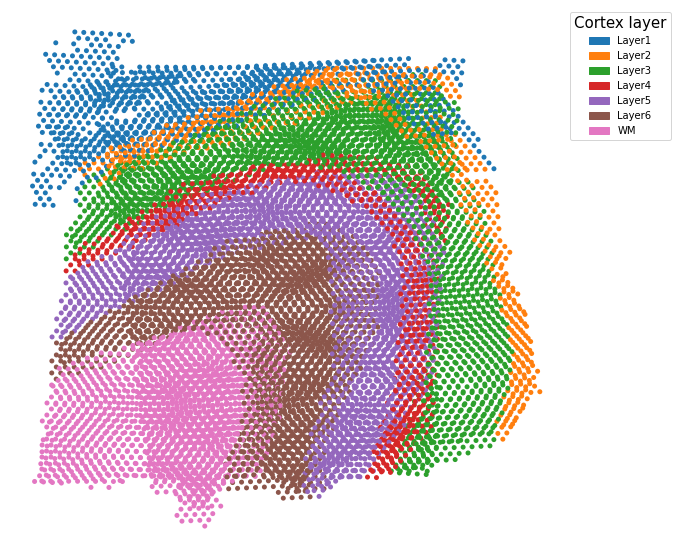

In [49]:
layer_to_color_map = {'Layer{0}'.format(i+1):sns.color_palette()[i] for i in range(6)}
layer_to_color_map['WM'] = sns.color_palette()[6]
def plot_slices_overlap(slices, layer_to_color_map=layer_to_color_map):
    plt.figure(figsize=(10,10))
    for i in range(len(slices)):
        adata = slices[i]
        colors = list(adata.obs['layer_guess_reordered'].astype('str').map(layer_to_color_map))
        plt.scatter(adata.obsm['spatial'][:,0],adata.obsm['spatial'][:,1],linewidth=0,s=100, marker=".",color=colors)
    plt.legend(handles=[mpatches.Patch(color=layer_to_color_map[adata.obs['layer_guess_reordered'].cat.categories[i]], label=adata.obs['layer_guess_reordered'].cat.categories[i]) for i in range(len(adata.obs['layer_guess_reordered'].cat.categories))],fontsize=10,title='Cortex layer',title_fontsize=15,bbox_to_anchor=(1, 1))
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.show()
    
plot_slices_overlap(new_slices)

Or just the first two, which reproduces Figure 3C of the paper:

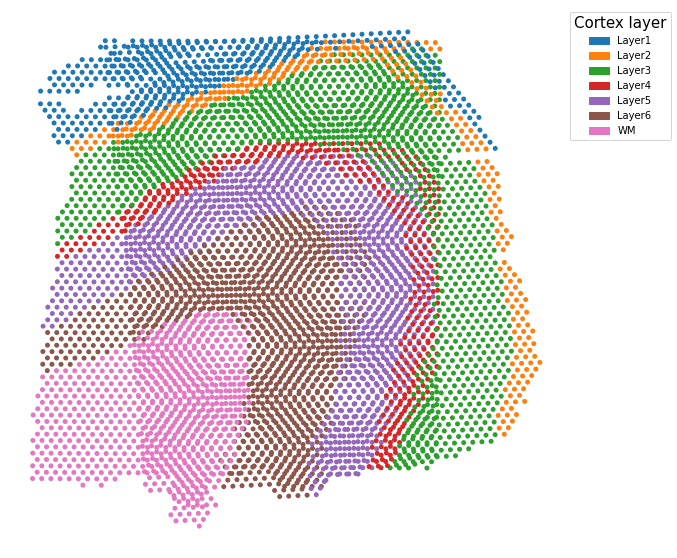

In [51]:
plot_slices_overlap(new_slices[:2])

# Let me know if PASTE2 runs on your machine! If you run into any problem don't hesitate to reach out at xl5434@princeton.edu. I will respond as quickly as possible.